<a href="https://colab.research.google.com/github/sanu1230/Personal_Projects/blob/master/Finance_Predicting_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance - Predicting Credit Card Fraud

## About Project

The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.


## Problem Statement


To prevalent fraud in finance domain, it is imperative for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


## Objective 

Classify fraudulent transaction from non fraudulent transactions using machine learning algorithms.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UpX/Financial_Analytics_Upx/1. Credit_Fraud/Class_Material/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

**Observation**
We see that the data is a second-hand data which seems to be already cleaned and normalised.
 

## Understand datatypes

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no missing values in this dataframe. So data imputation is **not** required.

## Data Visualization

### Distribution of 'Amount'.

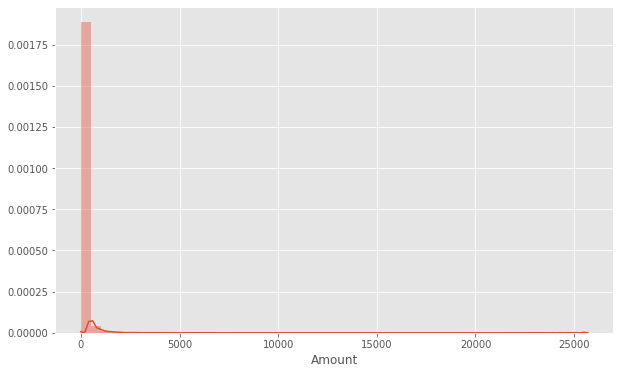

In [8]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.distplot(df['Amount'])

**Observation :**
The distribution is right skewed with very less transactions towards the higher amounts.

### Distribution of 'Time'.

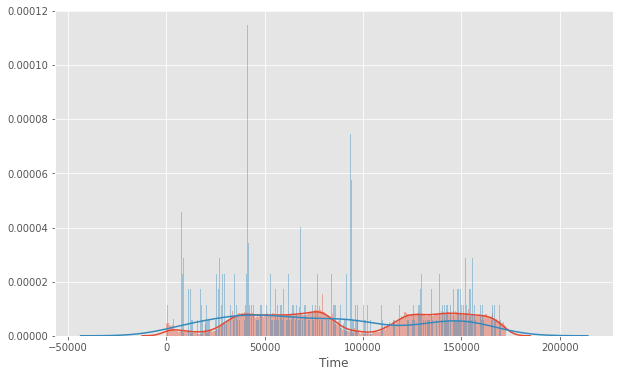

In [11]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.distplot(df['Time'],kde=True,bins=480)
sns.distplot(df.loc[df['Class'] == 1, 'Time'],kde=True,bins=480)


The time for fraudulent transactions is almost uniformly distributed with a certain level of **repetition or seasonality** after some interval of time.

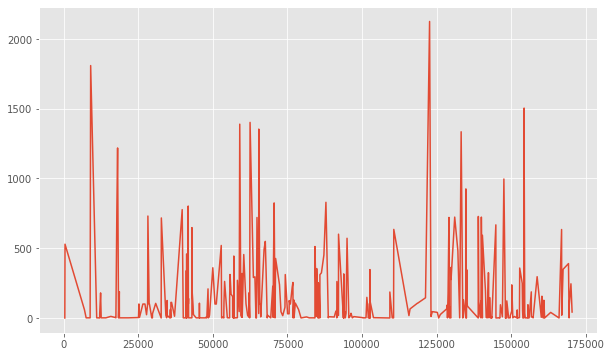

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df.loc[df['Class'] == 1, 'Time'],df.loc[df['Class'] == 1, 'Amount'])
plt.show()

### Distribution of V4 for fraudulent and non fraudulent transactions

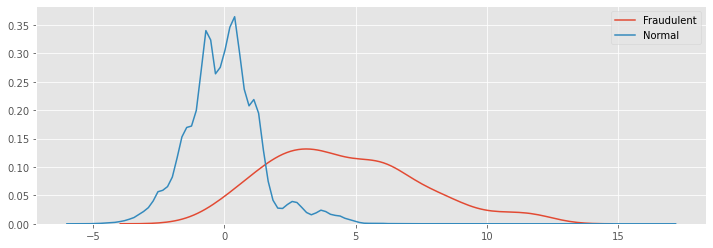

In [13]:
from matplotlib import style
# style.use('ggplot')
plt.figure(figsize=(12,4))
# sns.set_color_codes("pastel")

sns.kdeplot(df.loc[df['Class'] == 1, 'V4'],label='Fraudulent')
sns.kdeplot(df.loc[df['Class'] == 0, 'V4'],label='Normal')


It is quite evident that fraudulent and normal transactions are almost separated through this graph with the help of V4 attribute.

### Scatter plot between time of transaction and amount of transaction

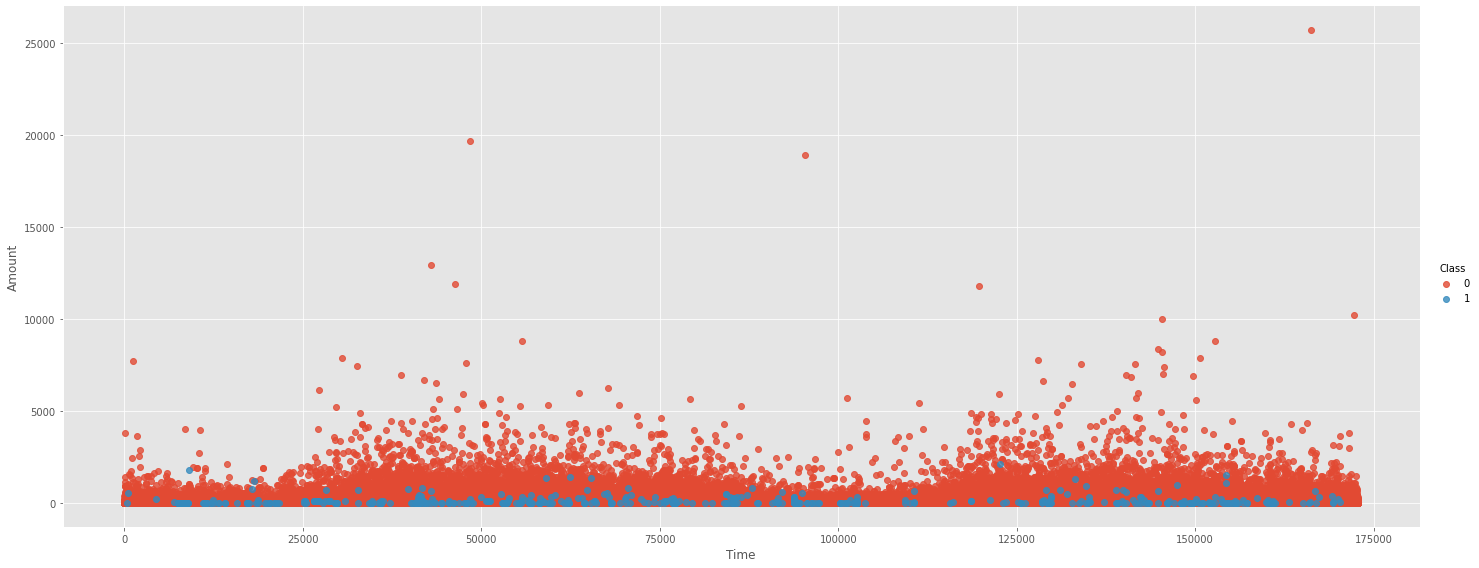

In [14]:
# plt.figure(figsize=(10, 6))
sns.lmplot('Time', # Horizontal axis
           'Amount', # Vertical axis
            data=df, # Data source
            fit_reg=False, # Don't fix a regression line
            hue="Class", # Set color
            aspect= 2.5, height = 8) 


It is evident that Fraudulent transactions are mostly below an amount of 1000 and never more than that.

### Correlation Heatmap

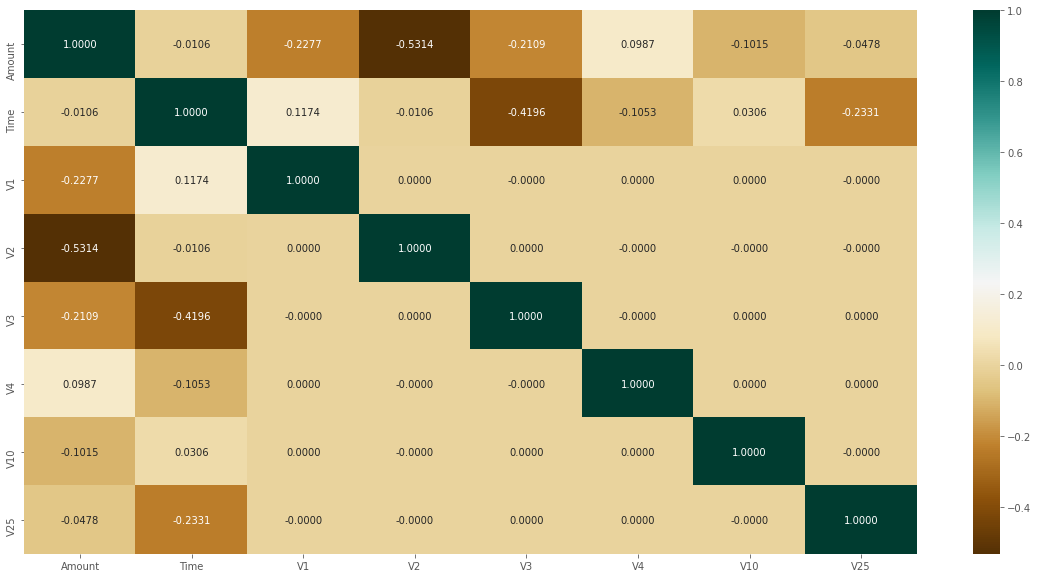

In [15]:
plt.figure(figsize=(20,10))
c = df[['Amount','Time','V1','V2','V3','V4','V10','V25']].corr()
sns.heatmap(c, cmap="BrBG", annot=True, fmt='.4f')

Amount is negatively correlated with V2
Time is negatively correlated with V3

## Handle imbalanced data using SMOTE

### Prepare the data

In [17]:
X = df.drop(['Class'],axis=1)
y = df.Class

In [111]:
col_name = X.columns
col_name

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [18]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
!pip install imblearn

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=42)

In [43]:
X_train.shape

(398041, 30)

## Logistic Regression

In [44]:
# Training data on Logistic Regression
logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_test = logreg.predict(X_test) # prediction for test set

lr_accuracy = metrics.accuracy_score(y_test, y_pred_test) # calculate accuracy
print(lr_accuracy) 

0.9716394374783838


In [59]:
# class distribution of the testing set
pd.Series(y_test).value_counts()

1    85440
0    85149
dtype: int64

In [60]:
# calculate null accuracy 
pd.Series(y_test).value_counts().head(1) / len(y_test)

1    0.500853
dtype: float64

**Observation :**
- Accuracy is not an appropriate metric in this scenario. 
- Lets employ confusion matrix and ROC curve to further understand performance of our model on test data.

In [61]:
#Confusion Matrix
conf=metrics.confusion_matrix(y_test, y_pred_test)
print(conf)

[[83444  1705]
 [ 3133 82307]]


Here the false negatives are very high which means around 3133 are wrongly classifed as non-defaulters when in reality they are defaulters.

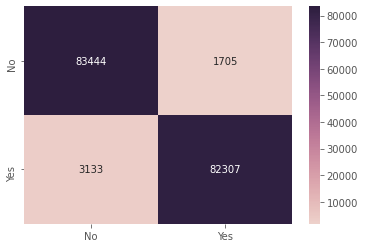

In [62]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap, xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [63]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

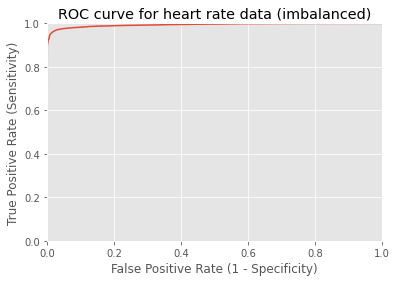

In [64]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [65]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.993124


## Decision Tree

In [82]:
# Importing Decision Tree and performing decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=3, min_samples_leaf=2, random_state=40)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [83]:
dt_accuracy = metrics.accuracy_score(y_test, dt_pred) # calculate accuracy
print(dt_accuracy) 

0.991417969505654


In [76]:
#Confusion Matrix
dtconf=metrics.confusion_matrix(y_test, dt_pred)
print(dtconf)

[[84903   246]
 [   75 85365]]


Here the false positive are high which means around 246 are wrongly classifed as defaulters when in reality they are non-defaulters.

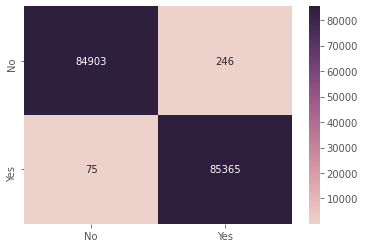

In [77]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(dtconf,cmap = cmap, xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [79]:
dtpredict_probabilities = dt.predict_proba(X_test)
dtfpr, dttpr, dtthresholds = metrics.roc_curve(y_test, dtpredict_probabilities[:,1])

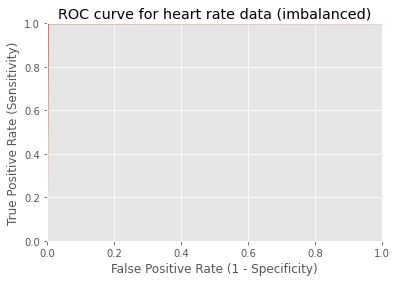

In [80]:
plt.plot(dtfpr, dttpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [81]:
dtroc_auc = metrics.auc(dtfpr, dttpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.993124


## Model Explaination

In [85]:
#Install Packages
!pip -q install imgaug==0.2.6
!pip -q install shap
!pip -q install eli5
!pip -q install lime

     |████████████████████████████████| 634kB 2.8MB/s 
     |████████████████████████████████| 276kB 2.9MB/s 
     |████████████████████████████████| 112kB 2.9MB/s 
     |████████████████████████████████| 276kB 2.8MB/s 


In [112]:
X_test.columns = col_name
X_test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

## LIME

In [113]:
X_test = pd.DataFrame(X_test)

In [114]:
# Import lime package
import lime
import lime.lime_tabular

#Find caegorical features
categorical_features = np.argwhere(np.array([len(set(X_test.values[:,x])) for x in range(X_test.values.shape[1])]) <= 10).flatten()

#Lime explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                                                   feature_names=X_test.columns.values.tolist(), 
                                                   class_names=['default'], 
                                                   categorical_features=categorical_features, 
                                                   verbose=True, mode='regression')
ind = 40

#Fit on test data
exp = explainer.explain_instance(X_test.values[ind], logreg.predict, num_features=3)

#Show in notebook features influencing predictions
exp.show_in_notebook(show_table=True)

Intercept 0.9469695165986994
Prediction_local [0.99706484]
Right: 1


## ELI5

In [119]:
# Import Eli5 package
import eli5
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
perm = PermutationImportance(logreg, random_state=1).fit(X_test,y_pred_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


Weight,Feature
0.2338 ± 0.0016,V14
0.1773 ± 0.0006,V3
0.1501 ± 0.0005,V12
0.1418 ± 0.0019,V17
0.1241 ± 0.0009,V10
0.1240 ± 0.0010,V4
0.0696 ± 0.0008,V7
0.0572 ± 0.0007,V16
0.0393 ± 0.0006,Time
0.0314 ± 0.0003,V11


In [120]:
#Understanding how each feature influences the prediction
eli5.show_prediction(logreg, doc=X_test.iloc[[ind]], feature_names=list(X_test.columns))

## SHAP

In [115]:
#Import SHAP package
import shap

#Create explainer for linear model
explainer = shap.LinearExplainer(logreg, data=X_test.values)
shap_values = explainer.shap_values(X_test)

In [116]:
#Understanding how each feature influences the prediction

shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test.iloc[ind,:],
    feature_names=X_test.columns.tolist()
)

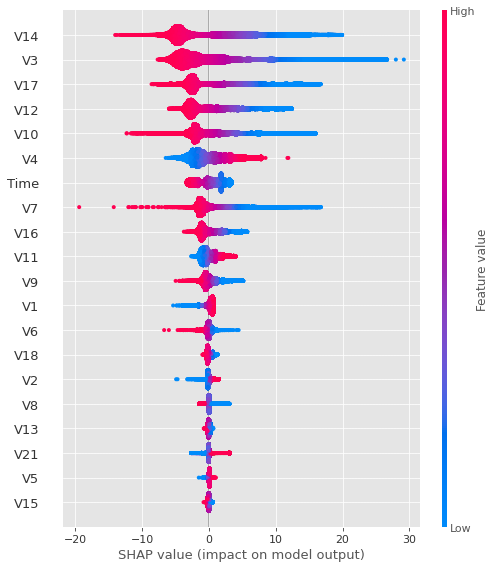

In [117]:
shap.summary_plot(shap_values, X_test)


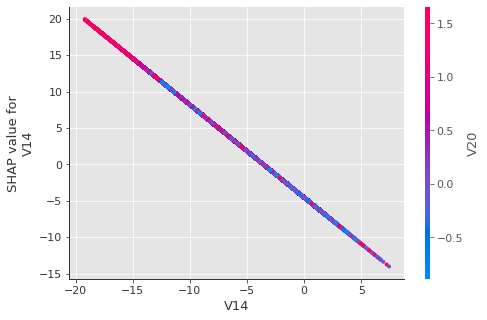

In [121]:
shap.dependence_plot("V14", shap_values, X_test)